<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [115]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [116]:
# loading the data: Wholesale customers data
customer_df = pd.read_csv('../data/Wholesale customers data.csv')
customer_df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [132]:
customer_df.describe().round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,1.32,2.54,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,0.47,0.77,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,1.00,2.00,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,1.00,3.00,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,2.00,3.00,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,2.00,3.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [118]:
# (Just for practice as this is visible by looking at the data)
# Checking out the types of each column to cehck if there is any categorical data to convert.
print(customer_df.dtypes)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [119]:
# Checking if there are any missing values
print(customer_df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [148]:
# Temporarily dropping Channel and Region as them being categorical,
# they have less value on the data analysis of the rest of features
temp_df = customer_df.drop(['Channel', 'Region'], axis=1)

In [ ]:
sns.pairplot(customer_df)
plt.show()

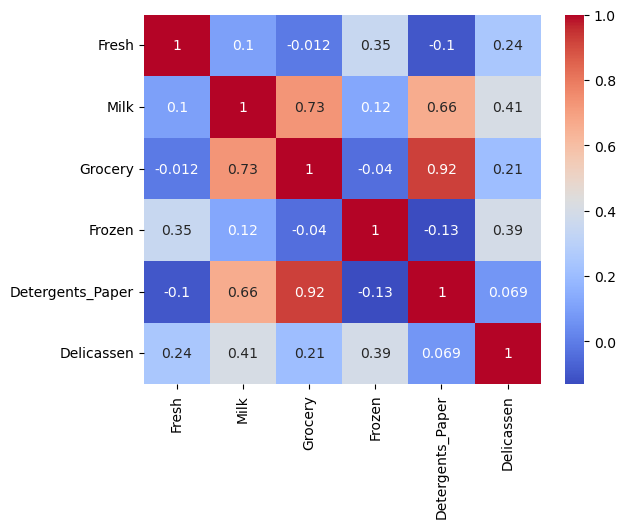

In [122]:
# Creating a correlation matrix
corr = temp_df.corr()

# Ploting a heatmap of the correlation between the different columns
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

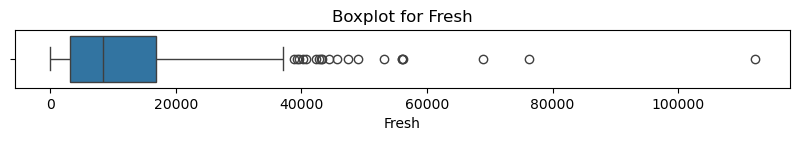

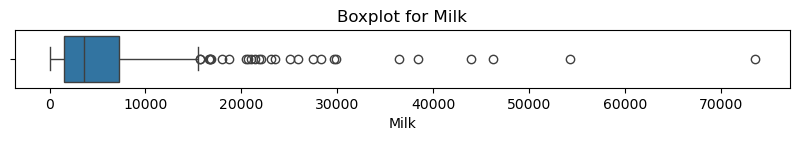

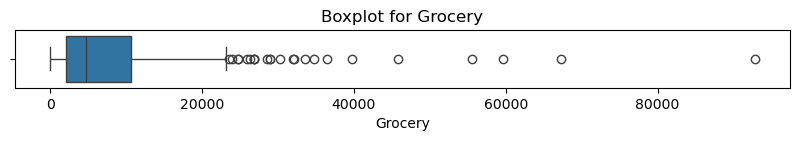

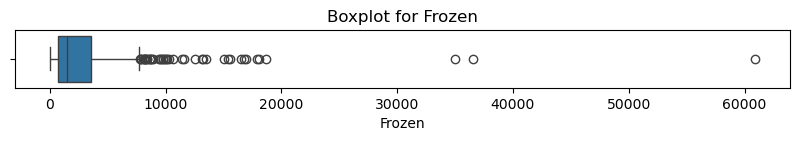

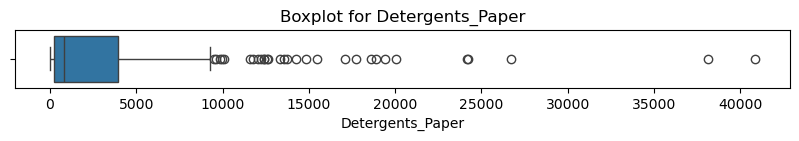

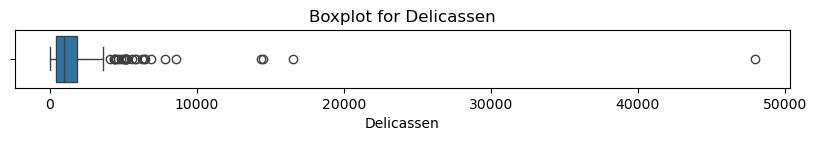

In [230]:

# Visualize boxplot for each column
for column in temp_df.columns:
    plt.figure(figsize=(10, .75))
    sns.boxplot(x=temp_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [124]:
for column in temp_df.columns:
    # Finding the upper (right) wishker for each Column in order to identify the potential outliers
    perc25 = temp_df[column].quantile(.25)
    perc75 = temp_df[column].quantile(.75)
    outliers_threshold = perc75 + 1.5*(perc75 - perc25)

    # Counting the outliers
    outliers_count = temp_df[column][temp_df[column] >= outliers_threshold].count()

    print(f"{outliers_count}/{temp_df.shape[0]} in {column} are potential outliers ({(outliers_count/temp_df.shape[0]).__round__(2)}%)")

20/440 in Fresh are potential outliers (0.05%)
28/440 in Milk are potential outliers (0.06%)
24/440 in Grocery are potential outliers (0.05%)
43/440 in Frozen are potential outliers (0.1%)
30/440 in Detergents_Paper are potential outliers (0.07%)
27/440 in Delicassen are potential outliers (0.06%)


In [125]:
# Checking if any columns are positively or negatively skewed
print(temp_df.skew().round(2))

Fresh                2.56
Milk                 4.05
Grocery              3.59
Frozen               5.91
Detergents_Paper     3.63
Delicassen          11.15
dtype: float64


In [156]:
# Checking the ranges of values in each column to see if standarization will be needed
print(f"Value ranges:\n{temp_df.max() - temp_df.min()}")

Value ranges:
Fresh               112148
Milk                 73443
Grocery              92777
Frozen               60844
Detergents_Paper     40824
Delicassen           47940
dtype: int64


In [126]:
# [Practice] We won't use it because I think the data could still be useful as is.
# Checking how Square Root Transformation could change skewedness for Delicassen.
temp_df2 = temp_df
temp_df2['Delicassen_sqrt'] = np.sqrt(temp_df['Delicassen'])
print(temp_df2.skew().round(2))

Fresh                2.56
Milk                 4.05
Grocery              3.59
Frozen               5.91
Detergents_Paper     3.63
Delicassen          11.15
Delicassen_sqrt      2.68
dtype: float64


**Your observations here**
- Columns description:
    Channel: The buying channel, like online, in the shop, etc.
    Region: The region of the customer, like Americas, Europe, Asia.
    The rest of the columns are the money spent on each category of products.

- There is no categorical columns to convert. Channel and region are categorical, but are already represented as ints.
- There are no missing values.
- The highest correlation is between Grocery and Detergents_paper, with 0.92 correlation we will drop the second.
- The value ranges in some columns like Fresh and Grocery are more than double than others, we perform feature scaling to standarize the data.
- As shown by the box plots and the outliers, there is around a 0.05% of outliers in each column. And shown by the skewness values, Delicassen is highly right-skewed. But I think this can still be useful for the model; indicating a few customers spent a lot in delicatessen.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [135]:
# Dropping Detergents_Paper as it has 0.92 correlation with Grocery
cust_clean_df = customer_df.drop(['Detergents_Paper'], axis=1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,2,3,12669,9656,7561,214,1338
1,2,3,7057,9810,9568,1762,1776
2,2,3,6353,8808,7684,2405,7844
3,1,3,13265,1196,4221,6404,1788
4,2,3,22615,5410,7198,3915,5185


**Your comment here**

-  Grocery and Detergents_paper have 0.92 correlation so we've dropped the second.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [245]:
from sklearn.preprocessing import StandardScaler

# Standarazing the data (fitting and transforming done in one step through fit_transform)
customers_scale = StandardScaler().fit_transform(customer_df)

# Converting to a DataFrame for visualization purposes
customers = pd.DataFrame(customers_scale, columns=customer_df.columns)
customers.describe().round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.69,-2.00,-0.95,-0.78,-0.84,-0.63,-0.60,-0.54
25%,-0.69,-0.70,-0.70,-0.58,-0.61,-0.48,-0.55,-0.40
50%,-0.69,0.59,-0.28,-0.29,-0.34,-0.32,-0.43,-0.20
75%,1.45,0.59,0.39,0.19,0.28,0.10,0.22,0.10
max,1.45,0.59,7.93,9.18,8.94,11.92,7.97,16.48


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [262]:
from sklearn.cluster import KMeans

# Initializing and fitting the model.
k_means = KMeans(n_clusters = 3).fit(customers_scale)

c:\Programas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [263]:
customers['labels'] = k_means.labels_

### Looking to the elbow we can choose 2 like the correct number of clusters

In [269]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

c:\Programas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [270]:
customers['Label'] = clusters

Count the values in `labels`.

In [271]:
customers.Label.value_counts()

Label
1    306
0    134
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [291]:
from sklearn.cluster import DBSCAN 

customers_dbs = DBSCAN(eps=.5).fit(customers_scale)
customers['labels_DBSCAN'] = customers_dbs.labels_

Count the values in `labels_DBSCAN`.

In [273]:
customers.labels_DBSCAN.value_counts()

Labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [280]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title(f'{x.name} vs {y.name} ')
    return plt.show();

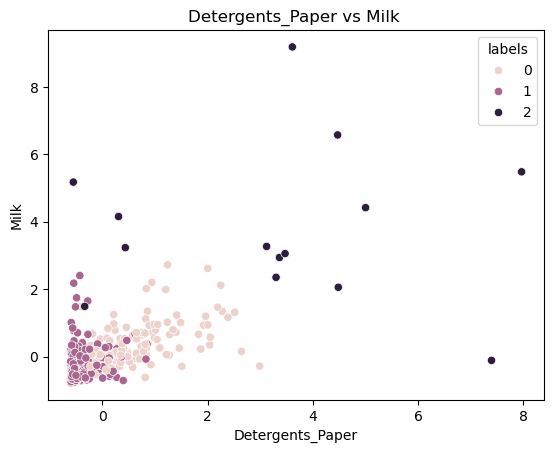

In [281]:
plot(customers['Detergents_Paper'], customers['Milk'], customers['labels'])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

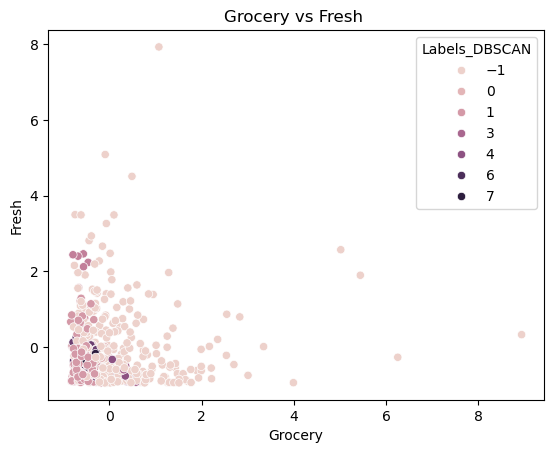

In [282]:
plot(customers['Grocery'], customers['Fresh'], customers['labels_DBSCAN'])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

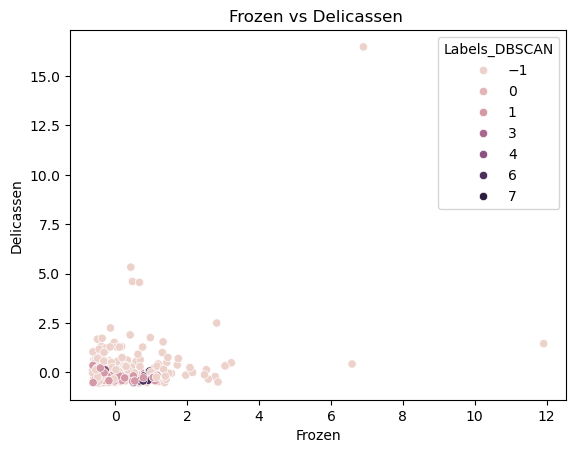

In [283]:
plot(customers['Frozen'], customers['Delicassen'], customers['labels_DBSCAN'])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [287]:
customers.groupby('labels').mean().round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,Labels_DBSCAN
labels,,,,,,,,,,
0,1.45,0.10,-0.30,0.40,0.63,-0.34,0.65,0.00,0.06,-0.54
1,-0.68,-0.05,0.08,-0.36,-0.43,0.07,-0.44,-0.11,1.00,0.65
2,0.99,0.04,1.13,3.81,3.37,1.57,3.29,2.20,0.14,-1.00


In [288]:
customers.groupby('labels_DBSCAN').mean().round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,labels
Labels_DBSCAN,,,,,,,,,,
-1,0.36,-0.12,0.14,0.35,0.37,0.15,0.31,0.20,0.54,0.61
0,1.45,0.59,-0.05,-0.31,-0.13,-0.48,0.14,-0.45,0.00,0.00
1,-0.69,0.59,-0.23,-0.53,-0.58,-0.19,-0.50,-0.28,1.00,1.00
2,-0.69,0.59,2.33,-0.59,-0.61,-0.37,-0.52,-0.26,1.00,1.00
3,1.45,0.59,-0.76,0.60,0.41,-0.51,0.61,-0.34,0.00,0.00
4,1.45,0.59,-0.71,0.04,0.25,-0.43,0.38,0.11,0.00,0.00
5,-0.69,-2.00,-0.17,-0.55,-0.61,-0.32,-0.53,-0.30,1.00,1.00
6,-0.69,-2.00,-0.41,-0.52,-0.59,0.76,-0.52,-0.32,1.00,1.00
7,-0.69,-0.70,-0.36,-0.58,-0.48,-0.10,-0.56,-0.21,1.00,1.00


Which algorithm appears to perform better?

**Your observations here**

- DBSCAN seems to perform better, with more clusters and means that are closer together for features that will be naturally correlated, like Milk and Grocery or Frozen and Fresh

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Number of Cluster = 4
k_means = KMeans(n_clusters =4).fit(customers_scale)
customers['labels'] = k_means.labels_

plot(customers['Detergents_Paper'], customers['Milk'], customers['labels'])
print(customers.groupby('labels').mean().round(2))

# Number of Cluster = 8
k_means = KMeans(n_clusters = 8).fit(customers_scale)
customers['labels'] = k_means.labels_

plot(customers['Detergents_Paper'], customers['Milk'], customers['labels'])
print(customers.groupby('labels').mean().round(2))

# Number of Cluster = 12
k_means = KMeans(n_clusters = 12).fit(customers_scale)
customers['labels'] = k_means.labels_

plot(customers['Detergents_Paper'], customers['Milk'], customers['labels'])
print(customers.groupby('labels').mean().round(2))

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

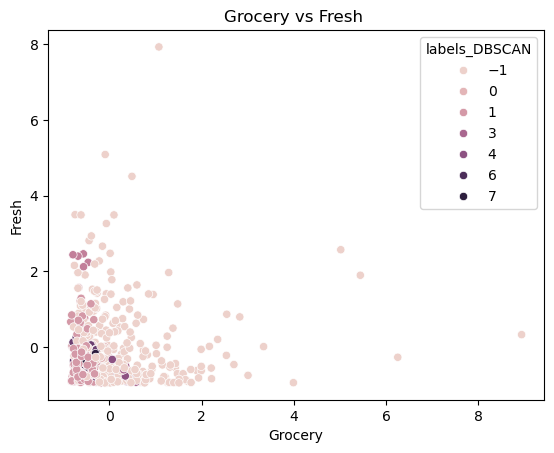

               Channel  Region  Fresh  Milk  Grocery  Frozen  \
labels_DBSCAN                                                  
-1                0.36   -0.12   0.14  0.35     0.37    0.15   
 0                1.45    0.59  -0.05 -0.31    -0.13   -0.48   
 1               -0.69    0.59  -0.23 -0.53    -0.58   -0.19   
 2               -0.69    0.59   2.33 -0.59    -0.61   -0.37   
 3                1.45    0.59  -0.76  0.60     0.41   -0.51   
 4                1.45    0.59  -0.71  0.04     0.25   -0.43   
 5               -0.69   -2.00  -0.17 -0.55    -0.61   -0.32   
 6               -0.69   -2.00  -0.41 -0.52    -0.59    0.76   
 7               -0.69   -0.70  -0.36 -0.58    -0.48   -0.10   

               Detergents_Paper  Delicassen  Label  Labels_DBSCAN  labels  
labels_DBSCAN                                                              
-1                         0.31        0.20   0.54           -1.0    5.27  
 0                         0.14       -0.45   0.00            0.0  

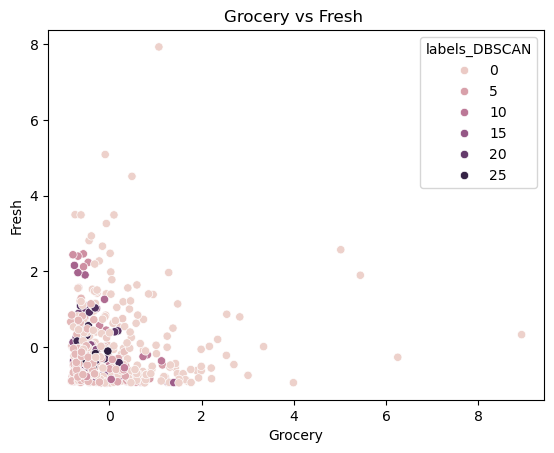

               Channel  Region  Fresh  Milk  Grocery  Frozen  \
labels_DBSCAN                                                  
-1                0.37   -0.16   0.23  0.50     0.52    0.28   
 0                1.45    0.59   0.23  0.23    -0.01   -0.41   
 1                1.45    0.59  -0.37  0.62     0.21   -0.28   
 2               -0.69    0.59  -0.23 -0.53    -0.58   -0.18   
 3                1.45    0.59  -0.05 -0.31    -0.13   -0.48   
 4                1.45    0.59  -0.70  0.25     0.31   -0.47   
 5                1.45    0.59  -0.66  0.70     1.01   -0.35   
 6               -0.69    0.59  -0.64 -0.19    -0.56   -0.41   
 7               -0.69    0.59   2.33 -0.59    -0.61   -0.37   
 8               -0.69    0.59   0.51 -0.29    -0.14   -0.19   
 9               -0.69    0.59  -0.51 -0.05     0.17   -0.58   
 10               1.45    0.59  -0.28  0.80     0.90   -0.07   
 11              -0.69    0.59  -0.90 -0.51    -0.01   -0.57   
 12              -0.69    0.59   1.14 -0

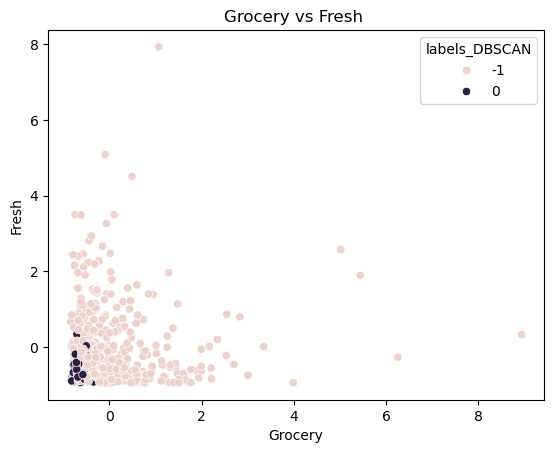

               Channel  Region  Fresh  Milk  Grocery  Frozen  \
labels_DBSCAN                                                  
-1                0.13   -0.11   0.08  0.11     0.12    0.07   
 0               -0.69    0.59  -0.45 -0.58    -0.64   -0.34   

               Detergents_Paper  Delicassen  Label  Labels_DBSCAN  labels  
labels_DBSCAN                                                              
-1                         0.10        0.06   0.64           0.11    5.29  
 0                        -0.52       -0.33   1.00           1.00    3.00  


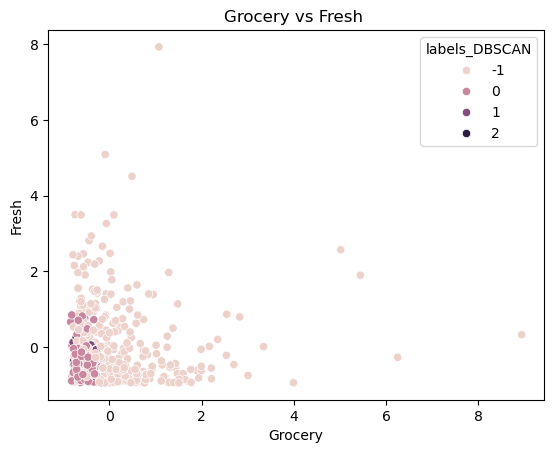

               Channel  Region  Fresh  Milk  Grocery  Frozen  \
labels_DBSCAN                                                  
-1                0.34   -0.10   0.13  0.26     0.29    0.12   
 0               -0.69    0.59  -0.28 -0.53    -0.58   -0.22   
 1               -0.69   -2.00  -0.34 -0.52    -0.60   -0.38   
 2               -0.69   -2.00   0.39 -0.65    -0.65   -0.12   

               Detergents_Paper  Delicassen  Label  Labels_DBSCAN  labels  
labels_DBSCAN                                                              
-1                         0.25        0.14   0.54          -0.43    5.22  
 0                        -0.50       -0.28   1.00           1.00    3.16  
 1                        -0.53       -0.33   1.00           5.00   11.00  
 2                        -0.55       -0.20   1.00           5.00   11.00  


In [308]:
# eps = .5 and min_samples = 5 (default)
customers_dbs = DBSCAN().fit(customers_scale)
customers['labels_DBSCAN'] = customers_dbs.labels_

plot(customers['Grocery'], customers['Fresh'], customers['labels_DBSCAN'])
print(customers.groupby('labels_DBSCAN').mean().round(2))

# eps = .5 and min_samples = 2
customers_dbs = DBSCAN(min_samples=2).fit(customers_scale)
customers['labels_DBSCAN'] = customers_dbs.labels_

plot(customers['Grocery'], customers['Fresh'], customers['labels_DBSCAN'])
print(customers.groupby('labels_DBSCAN').mean().round(2))

# eps = .3 and min_samples = 5
customers_dbs = DBSCAN(eps=.3).fit(customers_scale)
customers['labels_DBSCAN'] = customers_dbs.labels_

plot(customers['Grocery'], customers['Fresh'], customers['labels_DBSCAN'])
print(customers.groupby('labels_DBSCAN').mean().round(2))

# eps = .5 and min_samples = 6
customers_dbs = DBSCAN(eps=.5, min_samples=6).fit(customers_scale)
customers['labels_DBSCAN'] = customers_dbs.labels_

plot(customers['Grocery'], customers['Fresh'], customers['labels_DBSCAN'])
print(customers.groupby('labels_DBSCAN').mean().round(2))

**Your comment here**

- Reducing min_samples significantly doesn't seem to help as outliers are not identified.
- A low value of eps creates too little clusters.
- A high value of eps seems to identify too many data points as outliers
- So overall I'd say a valance eps, around 0.5 with a mid to high number of min_samples offers the best results in this particular case.